<H1 style="color:#8B7959">ADIA</H1>

<H2 style="color:#8B7959">PIPELINE EXAMPLE</H2>

In [1]:
import sys

In [2]:
github_folder_path = r'..'  # Relative path
if github_folder_path not in sys.path:
    sys.path.append(github_folder_path)

from L0_Library.config import *
from L1_Dev.data_prep import DataPrep
from L1_Dev.news import News
from L1_Dev.clusters import Clusters

In [3]:
pipeline = DataPrep(API_key='db-SEbmRhQ3ekjnrdRQLfK4iDYJhVkrL',
                    dataset='XNAS.ITCH',
                    start_date=datetime(2019, 1, 1),  # Might be good to use datetime.date
                    start_hour=9,
                    start_minute=30,
                    end_date=datetime(2019, 12, 31),
                    end_hour=16,
                    end_minute=0,
                    time_zone='US/Eastern')

In [4]:
pipeline_news = News(base_url='https://stocknewsapi.com/api/v1',
                     API_key='7vjl2kzbnxdltdz2hxixyzhbc07yltk4keyh5az9',
                     start_date=datetime(2019, 1, 1),
                     end_date=datetime(2020, 3, 7))

In [5]:
clusters = Clusters()

<H3 style="color:#8B7959">LOB DATA</H3>

In [6]:
# Get data from DataBento
df_lob_data, trading_days, trading_dates = pipeline.get_data('TSLA')
df_lob_data

Processing: 100%|█████████████████████████████████████████████████| 365/365 [26:10<00:00,  4.30s/it]


,symbol,action,side,depth,price,size,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00
ts_event,,,,,,,,,,
2019-01-02 09:30:00.423428343,TSLA,T,N,0,306.07000,308,306.06000,306.51000,3,3
2019-01-02 09:30:00.548210475,TSLA,T,B,0,306.51000,3,306.06000,306.51000,3,3
2019-01-02 09:30:00.548210475,TSLA,C,N,0,306.51000,3,306.06000,306.97000,3,250
2019-01-02 09:30:00.548239858,TSLA,A,N,0,306.39000,100,306.39000,306.97000,100,250
2019-01-02 09:30:00.549953495,TSLA,C,N,0,306.39000,100,306.15000,306.97000,200,250
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 15:59:59.969678000,TSLA,A,N,0,418.30000,120,418.08000,418.30000,400,120
2019-12-31 15:59:59.969709539,TSLA,A,N,0,418.30000,1,418.08000,418.30000,400,121
2019-12-31 15:59:59.993704903,TSLA,A,N,0,418.30000,2850,418.08000,418.30000,400,2971


<H3 style="color:#8B7959">PRICES</H3>

In [7]:
# Calculate prices
df_prices = pipeline.mid_price(df_input=df_lob_data, resample_freq='1T', type_mid='vwmp', drop_na=False)
df_prices

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,306.12816,307.91784,306.20293,NaN,NaN,322.03777,341.91055,335.65824,334.03033,341.91194,...,NaN,412.29146,417.74238,NaN,428.93943,434.38367,NaN,NaN,427.53073,403.89470
09:31:00,308.76829,307.72670,303.89870,NaN,NaN,320.52575,340.87571,333.94217,335.34723,342.97965,...,NaN,410.63262,416.85604,NaN,428.11848,432.84522,NaN,NaN,427.51589,405.18644
09:32:00,307.95737,306.82941,303.94273,NaN,NaN,320.73226,340.22662,332.60598,335.19966,343.38318,...,NaN,411.09523,416.01770,NaN,427.35308,431.50729,NaN,NaN,425.18063,407.68317
09:33:00,305.87287,305.42390,304.14603,NaN,NaN,320.24113,341.32121,333.56801,334.97915,342.46288,...,NaN,411.76429,415.43624,NaN,427.11650,432.59344,NaN,NaN,423.34968,409.64552
09:34:00,304.54672,305.69009,304.70078,NaN,NaN,320.82237,341.62435,333.90513,335.69707,342.41082,...,NaN,413.63424,414.32160,NaN,427.08168,433.50964,NaN,NaN,421.99347,409.78542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,309.69444,301.07251,316.80668,NaN,NaN,335.29768,334.98976,338.35889,345.09840,347.49434,...,NaN,418.71747,425.17000,NaN,430.99066,430.19959,NaN,NaN,414.55145,418.48020
15:56:00,309.30795,300.63828,317.20249,NaN,NaN,334.79893,334.94469,338.86333,344.62972,347.44545,...,NaN,418.77281,425.27417,NaN,431.11393,430.21197,NaN,NaN,414.66000,418.19443
15:57:00,309.30464,300.46269,317.74870,NaN,NaN,334.72046,335.07606,338.76096,344.81877,347.32803,...,NaN,418.82150,425.17000,NaN,430.99498,430.32799,NaN,NaN,414.63482,417.77592


<H3 style="color:#8B7959">RETURNS</H3>

In [8]:
# Calculate returns
df_returns = pipeline.returns(df_input=df_prices)
df_returns

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,0.00859,-0.00062,-0.00755,NaN,NaN,-0.00471,-0.00303,-0.00513,0.00393,0.00312,...,NaN,-0.00403,-0.00212,NaN,-0.00192,-0.00355,NaN,NaN,-0.00003,0.00319
09:32:00,-0.00263,-0.00292,0.00014,NaN,NaN,0.00064,-0.00191,-0.00401,-0.00044,0.00118,...,NaN,0.00113,-0.00201,NaN,-0.00179,-0.00310,NaN,NaN,-0.00548,0.00614
09:33:00,-0.00679,-0.00459,0.00067,NaN,NaN,-0.00153,0.00321,0.00289,-0.00066,-0.00268,...,NaN,0.00163,-0.00140,NaN,-0.00055,0.00251,NaN,NaN,-0.00432,0.00480
09:34:00,-0.00435,0.00087,0.00182,NaN,NaN,0.00181,0.00089,0.00101,0.00214,-0.00015,...,NaN,0.00453,-0.00269,NaN,-0.00008,0.00212,NaN,NaN,-0.00321,0.00034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,0.00162,-0.00022,-0.00040,NaN,NaN,-0.00035,0.00038,0.00015,-0.00045,-0.00014,...,NaN,0.00101,0.00003,NaN,0.00044,0.00059,NaN,NaN,0.00005,0.00044
15:56:00,-0.00125,-0.00144,0.00125,NaN,NaN,-0.00149,-0.00013,0.00149,-0.00136,-0.00014,...,NaN,0.00013,0.00024,NaN,0.00029,0.00003,NaN,NaN,0.00026,-0.00068
15:57:00,-0.00001,-0.00058,0.00172,NaN,NaN,-0.00023,0.00039,-0.00030,0.00055,-0.00034,...,NaN,0.00012,-0.00024,NaN,-0.00028,0.00027,NaN,NaN,-0.00006,-0.00100


<H3 style="color:#8B7959">BIPOWER VARIATION</H3>

In [9]:
# Calculate bipower variation
df_bipower_variation = pipeline.rolling_bipower_variation(df_input=df_returns, K=390)
df_bipower_variation

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,0.0000026224,0.0000013933,NaN,NaN,0.0000011224,0.0000013590,0.0000011482,0.0000009428,0.0000008567,...,NaN,0.0000007287,0.0000005268,NaN,0.0000004962,0.0000003381,NaN,NaN,0.0000006842,0.0000010897
09:32:00,NaN,0.0000025386,0.0000013904,NaN,NaN,0.0000011302,0.0000013701,0.0000012079,0.0000008668,0.0000008645,...,NaN,0.0000007103,0.0000005257,NaN,0.0000005096,0.0000003686,NaN,NaN,0.0000006407,0.0000011682
09:33:00,NaN,0.0000025206,0.0000013366,NaN,NaN,0.0000011338,0.0000013908,0.0000012299,0.0000008212,0.0000008761,...,NaN,0.0000007003,0.0000005297,NaN,0.0000005136,0.0000003960,NaN,NaN,0.0000007047,0.0000011918
09:34:00,NaN,0.0000024176,0.0000013254,NaN,NaN,0.0000011401,0.0000013911,0.0000012302,0.0000008151,0.0000008720,...,NaN,0.0000007092,0.0000005151,NaN,0.0000005137,0.0000004173,NaN,NaN,0.0000007391,0.0000011425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0.0000014023,0.0000011149,NaN,NaN,0.0000013662,0.0000011568,0.0000009378,0.0000008560,0.0000006534,...,NaN,0.0000005274,0.0000004969,NaN,0.0000003336,0.0000006887,NaN,NaN,0.0000010873,0.0000007546
15:56:00,NaN,0.0000013954,0.0000011156,NaN,NaN,0.0000013663,0.0000011549,0.0000009385,0.0000008576,0.0000006510,...,NaN,0.0000005275,0.0000004969,NaN,0.0000003341,0.0000006883,NaN,NaN,0.0000010873,0.0000007558
15:57:00,NaN,0.0000013988,0.0000011208,NaN,NaN,0.0000013591,0.0000011537,0.0000009401,0.0000008588,0.0000006482,...,NaN,0.0000005272,0.0000004969,NaN,0.0000003342,0.0000006880,NaN,NaN,0.0000010873,0.0000007585


<H3 style="color:#8B7959">PERIODICITY</H3>

In [10]:
# Calculate periodicity
df_std_returns_1 = df_returns / np.sqrt(df_bipower_variation)
df_f0 = pipeline.df_periodicity(df_input=df_std_returns_1, threshold=16)
df_std_returns_2 = df_std_returns_1 / df_f0
df_f1 = pipeline.df_periodicity(df_input=df_std_returns_2, threshold=6.635)
df_f = df_f0 * df_f1
df_f

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,3.42020,3.42020,NaN,NaN,3.42020,3.42020,3.42020,3.42020,3.42020,...,NaN,3.42020,3.42020,NaN,3.42020,3.42020,NaN,NaN,3.42020,3.42020
09:32:00,NaN,3.06144,3.06144,NaN,NaN,3.06144,3.06144,3.06144,3.06144,3.06144,...,NaN,3.06144,3.06144,NaN,3.06144,3.06144,NaN,NaN,3.06144,3.06144
09:33:00,NaN,3.02404,3.02404,NaN,NaN,3.02404,3.02404,3.02404,3.02404,3.02404,...,NaN,3.02404,3.02404,NaN,3.02404,3.02404,NaN,NaN,3.02404,3.02404
09:34:00,NaN,2.59493,2.59493,NaN,NaN,2.59493,2.59493,2.59493,2.59493,2.59493,...,NaN,2.59493,2.59493,NaN,2.59493,2.59493,NaN,NaN,2.59493,2.59493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,1.02725,1.02725,NaN,NaN,1.02725,1.02725,1.02725,1.02725,1.02725,...,NaN,1.02725,1.02725,NaN,1.02725,1.02725,NaN,NaN,1.02725,1.02725
15:56:00,NaN,0.76007,0.76007,NaN,NaN,0.76007,0.76007,0.76007,0.76007,0.76007,...,NaN,0.76007,0.76007,NaN,0.76007,0.76007,NaN,NaN,0.76007,0.76007
15:57:00,NaN,0.78978,0.78978,NaN,NaN,0.78978,0.78978,0.78978,0.78978,0.78978,...,NaN,0.78978,0.78978,NaN,0.78978,0.78978,NaN,NaN,0.78978,0.78978


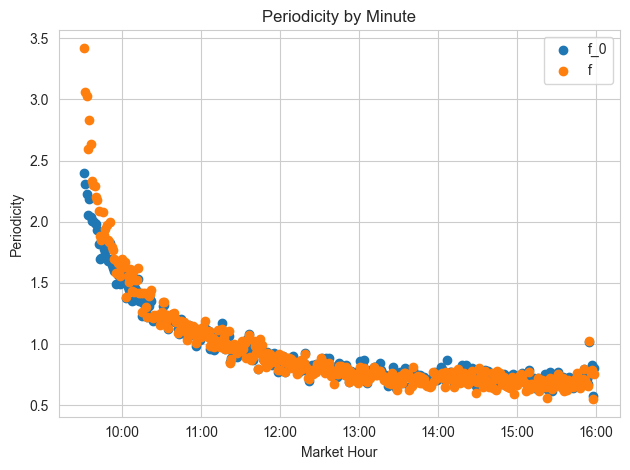

In [11]:
# Plot periodicity
%matplotlib inline
sns.set_style("whitegrid")
plt.scatter(pd.to_datetime(df_f0.index, format='%H:%M:%S'), df_f0.iloc[:, 1], label='f_0', marker='o')
plt.scatter(pd.to_datetime(df_f.index, format='%H:%M:%S'), df_f.iloc[:, 1], label='f', marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=0)
plt.xlabel('Market Hour')
plt.ylabel('Periodicity')
plt.title('Periodicity by Minute')
plt.legend()
plt.tight_layout()
plt.show()

<H3 style="color:#8B7959">JUMP SCORE</H3>

In [12]:
# Calculate jump score
df_jump_score = pipeline.jump_score(df_returns=df_returns, df_bipower_variation=df_bipower_variation, df_f=df_f)
df_jump_score

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,-0.11211,-1.87105,NaN,NaN,-1.29883,-0.76026,-1.39858,1.18481,0.98491,...,NaN,-1.38083,-0.85564,NaN,-0.79520,-1.78403,NaN,NaN,-0.01227,0.89434
09:32:00,NaN,-0.59866,0.04014,NaN,NaN,0.19789,-0.53190,-1.19160,-0.15442,0.41309,...,NaN,0.43639,-0.90692,NaN,-0.81879,-1.66556,NaN,NaN,-2.23530,1.85654
09:33:00,NaN,-0.95630,0.19125,NaN,NaN,-0.47592,0.90067,0.86120,-0.24013,-0.94815,...,NaN,0.64258,-0.63550,NaN,-0.25552,1.32099,NaN,NaN,-1.70003,1.45451
09:34:00,NaN,0.21592,0.60999,NaN,NaN,0.65447,0.29006,0.35098,0.91379,-0.06273,...,NaN,2.07347,-1.44257,NaN,-0.04384,1.26206,NaN,NaN,-1.43828,0.12310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,-0.18309,-0.36738,NaN,NaN,-0.29432,0.34830,0.14936,-0.47593,-0.16354,...,NaN,1.34811,0.04648,NaN,0.74155,0.69157,NaN,NaN,0.04360,0.49141
15:56:00,NaN,-1.60753,1.55530,NaN,NaN,-1.67549,-0.16470,2.02322,-1.93082,-0.22946,...,NaN,0.23940,0.45723,NaN,0.65089,0.04563,NaN,NaN,0.33034,-1.03382
15:57:00,NaN,-0.62543,2.05764,NaN,NaN,-0.25458,0.46225,-0.39456,0.74931,-0.53157,...,NaN,0.20276,-0.44001,NaN,-0.60443,0.41158,NaN,NaN,-0.07374,-1.45570


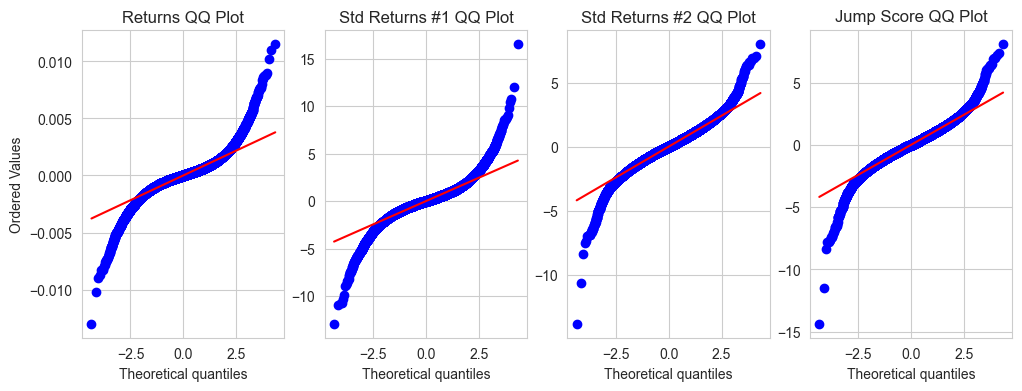

In [13]:
# Calculate quantiles and generate the QQ plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
stats.probplot(df_returns.unstack().dropna(), dist='norm', plot=axes[0])
axes[0].set_title('Returns QQ Plot')
axes[0].set_ylabel('Ordered Values')
stats.probplot(df_std_returns_1.unstack().dropna(), dist='norm', plot=axes[1])
axes[1].set_title('Std Returns #1 QQ Plot')
axes[1].set_ylabel('')
stats.probplot(df_std_returns_2.unstack().dropna(), dist='norm', plot=axes[2])
axes[2].set_title('Std Returns #2 QQ Plot')
axes[2].set_ylabel('')
stats.probplot(df_jump_score.unstack().dropna(), dist='norm', plot=axes[3])
axes[3].set_title('Jump Score QQ Plot')
axes[3].set_ylabel('')
plt.show()

<H3 style="color:#8B7959">JUMPS</H3>

In [14]:
# Get jumps
df_jumps = pipeline.get_jumps(df_input=df_jump_score)
df_jumps
# Filter jumps
# df_jumps[(df_jumps.index < pd.to_datetime('09:37:00').time())]
# df_jumps.loc[pd.to_datetime('09:37:00').time(), '2019-01-03']

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:32:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:33:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:34:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:56:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:57:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0


In [15]:
df_jumps.sum().sum()

141.0

In [16]:
list_dates_w_jumps = clusters.get_dates_with_jumps(df_input=df_jumps)
list_dates_w_jumps

['01/03/2019',
 '01/11/2019',
 '01/14/2019',
 '01/17/2019',
 '01/18/2019',
 '01/23/2019',
 '01/28/2019',
 '01/30/2019',
 '02/07/2019',
 '02/12/2019',
 '02/14/2019',
 '02/20/2019',
 '02/21/2019',
 '03/05/2019',
 '03/07/2019',
 '03/08/2019',
 '03/12/2019',
 '03/20/2019',
 '03/21/2019',
 '03/22/2019',
 '04/04/2019',
 '04/08/2019',
 '04/11/2019',
 '04/18/2019',
 '04/25/2019',
 '05/01/2019',
 '05/08/2019',
 '05/15/2019',
 '05/17/2019',
 '05/28/2019',
 '05/29/2019',
 '06/03/2019',
 '06/14/2019',
 '06/18/2019',
 '06/19/2019',
 '06/20/2019',
 '06/24/2019',
 '06/28/2019',
 '07/22/2019',
 '07/24/2019',
 '07/29/2019',
 '07/31/2019',
 '08/01/2019',
 '08/07/2019',
 '08/08/2019',
 '08/09/2019',
 '08/23/2019',
 '08/27/2019',
 '08/28/2019',
 '09/04/2019',
 '09/12/2019',
 '09/18/2019',
 '09/20/2019',
 '09/24/2019',
 '09/26/2019',
 '10/01/2019',
 '10/03/2019',
 '10/08/2019',
 '10/10/2019',
 '10/15/2019',
 '10/18/2019',
 '10/21/2019',
 '10/23/2019',
 '10/25/2019',
 '11/04/2019',
 '11/05/2019',
 '11/06/20

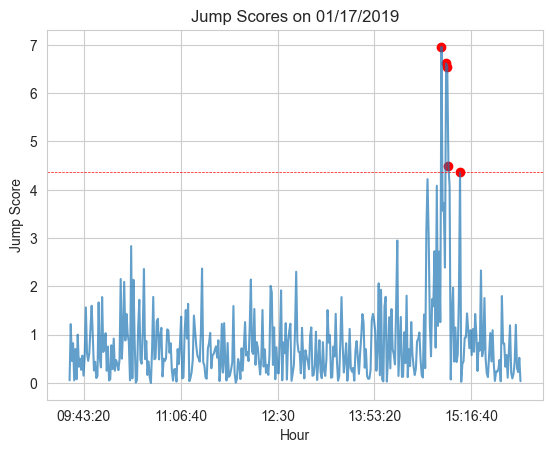

In [21]:
plot_date = 3
ax = abs(df_jump_score[list_dates_w_jumps[plot_date]]).plot(ylabel='Jump Score',
                                                            title=f'Jump Scores on {list_dates_w_jumps[plot_date]}', alpha=0.7)
markers = [i if i > 4.36 else np.nan for i in abs(df_jump_score[list_dates_w_jumps[plot_date]])]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

<H3 style="color:#8B7959">JUMPS INTER-TIMES</H3>

In [22]:
df_inter_times = clusters.calculate_jump_inter_times(df_input=df_jumps, list_input=list_dates_w_jumps)
df_inter_times

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:32:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:33:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:34:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:56:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:57:00,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0


<H3 style="color:#8B7959">BERNOULLI HYPOTHESIS-TEST IMPLIED PROBABILITY</H3>

In [23]:
df_bernoulli_p = clusters.bernoulli_trials_p(df_input=df_jumps, rolling_window=1945)
df_bernoulli_p

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00051,0.00000,...,NaN,0.00308,0.00051,NaN,0.00051,0.00051,NaN,NaN,0.00000,0.00000
09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00051,0.00000,...,NaN,0.00308,0.00051,NaN,0.00051,0.00051,NaN,NaN,0.00000,0.00000
09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00051,0.00000,...,NaN,0.00308,0.00051,NaN,0.00051,0.00051,NaN,NaN,0.00000,0.00000
09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00051,0.00000,...,NaN,0.00308,0.00051,NaN,0.00051,0.00051,NaN,NaN,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00051,...,NaN,0.00051,0.00051,NaN,0.00051,0.00000,NaN,NaN,0.00000,0.00000
15:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00051,...,NaN,0.00051,0.00051,NaN,0.00051,0.00000,NaN,NaN,0.00000,0.00000
15:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00051,...,NaN,0.00051,0.00051,NaN,0.00051,0.00000,NaN,NaN,0.00000,0.00000


<H3 style="color:#8B7959">BERNOULLI HYPOTHESIS-TEST IMPLIED THRESHOLD</H3>

In [24]:
df_threshold = clusters.bernoulli_hypothesis_threshold(df_input=df_bernoulli_p)
df_threshold

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.73981,-inf,...,NaN,15.60192,98.73981,NaN,98.73981,98.73981,NaN,NaN,-inf,-inf
09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.73981,-inf,...,NaN,15.60192,98.73981,NaN,98.73981,98.73981,NaN,NaN,-inf,-inf
09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.73981,-inf,...,NaN,15.60192,98.73981,NaN,98.73981,98.73981,NaN,NaN,-inf,-inf
09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.73981,-inf,...,NaN,15.60192,98.73981,NaN,98.73981,98.73981,NaN,NaN,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,98.73981,...,NaN,98.73981,98.73981,NaN,98.73981,-inf,NaN,NaN,-inf,-inf
15:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,98.73981,...,NaN,98.73981,98.73981,NaN,98.73981,-inf,NaN,NaN,-inf,-inf
15:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,98.73981,...,NaN,98.73981,98.73981,NaN,98.73981,-inf,NaN,NaN,-inf,-inf


<H3 style="color:#8B7959">CLUSTERED JUMPS</H3>

In [25]:
df_clustered_jumps = clusters.cluster_jumps(df_inter_times=df_inter_times, df_threshold=df_threshold,
                                            list_dates_w_jumps=list_dates_w_jumps)
df_clustered_jumps

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0
15:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,0,0,NaN,0,0,NaN,NaN,0,0


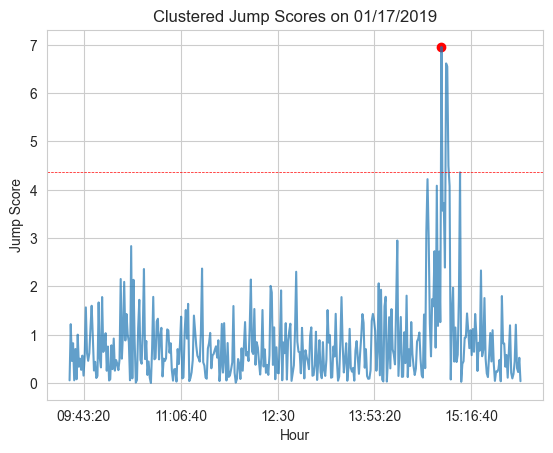

In [27]:
plot_date = 3
ax = abs(df_jump_score[list_dates_w_jumps[plot_date]]).plot(ylabel='Jump Score',
                                                            title=f'Clustered Jump Scores on {list_dates_w_jumps[plot_date]}', alpha=0.7)
markers = [value if (value > 4.36) & (df_clustered_jumps[list_dates_w_jumps[plot_date]].iloc[index] == 1) \
           else np.nan for index, value in enumerate(abs(df_jump_score[list_dates_w_jumps[plot_date]]))]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

<H3 style="color:#8B7959">STORE DATA IN HDF5 FORMAT</H3>

We could compare how much it would take to store the files in different formats. I pick the most efficient.
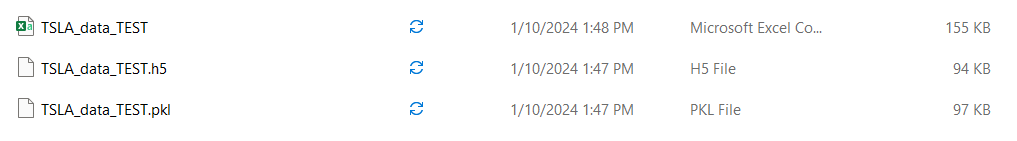

In [28]:
# WRITE
hdf5_file_path = '../Data/TSLA_data.h5'

# Write the DataFrames to the HDF5 file
df_prices.to_hdf(hdf5_file_path, key='prices', mode='w')
df_returns.to_hdf(hdf5_file_path, key='returns', mode='a')
df_bipower_variation.to_hdf(hdf5_file_path, key='bipower_variation', mode='a')
df_f0.to_hdf(hdf5_file_path, key='periodicity_0', mode='a')
df_f1.to_hdf(hdf5_file_path, key='periodicity_1', mode='a')
df_f.to_hdf(hdf5_file_path, key='periodicity', mode='a')
df_jump_score.to_hdf(hdf5_file_path, key='jump_score', mode='a')
df_jumps.to_hdf(hdf5_file_path, key='jumps', mode='a')

# Create an HDF5 file and write DataFrames to it
with h5py.File(hdf5_file_path, 'a') as hdf_file:    
    # Add attributes to the file level
    hdf_file.attrs['Description'] = 'HDF5 File storing data pipeline'
    hdf_file.attrs['Start_Date'] = '01-01-2019'
    hdf_file.attrs['End_Date'] = '01-01-2019'
    hdf_file.attrs['Start_Time'] = '09:30'
    hdf_file.attrs['End_Time'] = '16:00'
    hdf_file.attrs['Time_Zone'] = 'US/Eastern'

In [ ]:
# READ
hdf5_file_path = '../Data/TSLA_data.h5'

# Read the DataFrames from the HDF5 file
df_prices = pd.read_hdf(hdf5_file_path, key='prices')
df_returns = pd.read_hdf(hdf5_file_path, key='returns')
df_bipower_variation = pd.read_hdf(hdf5_file_path, key='bipower_variation')
df_f0 = pd.read_hdf(hdf5_file_path, key='periodicity_0')
df_f1 = pd.read_hdf(hdf5_file_path, key='periodicity_1')
df_f = pd.read_hdf(hdf5_file_path, key='periodicity')
df_jump_score = pd.read_hdf(hdf5_file_path, key='jump_score')
df_jumps = pd.read_hdf(hdf5_file_path, key='jumps')

# Open the HDF5 file to read attributes
with h5py.File('../Data/TSLA_data.h5', 'r') as hdf_file:
    # Get the attributes of the root group (the file itself)
    for attr_name, attr_value in hdf_file.attrs.items():
        if attr_name not in ['CLASS', 'VERSION', 'PYTABLES_FORMAT_VERSION', 'TITLE']:
            print(f"{attr_name}: {attr_value}")

<H3 style="color:#8B7959">NEWS</H3>

In [ ]:
response = pipeline_news.get_news(symbol=['LULU'], items=4, page=1, news_type='article')

In [ ]:
try:
    for article in response[:4]:
        print(f"Title: {article['title']}")
        print(f"URL: {article['news_url']}")
        print(f"Image URL: {article['image_url']}")
        print(f"Text: {article['text']}")
        print(f"Source Name: {article['source_name']}")
        print(f"Date: {article['date']}")
        print(f"Topics: {article['topics']}")
        print(f"Sentiment: {article['sentiment']}")
        print(f"Type: {article['type']}")
        print(f"Tickers: {article['tickers']}\n")
except requests.exceptions.HTTPError as err:
    print(f"An error occurred: {err}")